In [1]:
%matplotlib inline
import mglearn
import numpy as np
import scipy
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
from IPython import display

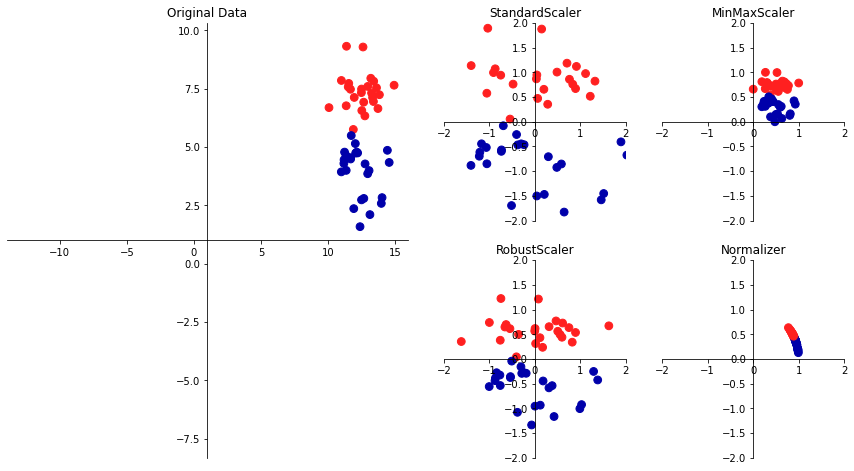

In [2]:
mglearn.plots.plot_scaling()

In [3]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state=0)

print("train data shape:", X_train.shape)
print("train target shape:", y_train.shape)
print("test data shape:", X_test.shape)

train data shape: (426, 30)
train target shape: (426,)
test data shape: (143, 30)


In [4]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

scaler.fit(X_train)

MinMaxScaler()

In [5]:
X_train_scaled = scaler.transform(X_train)
print("data shape:", X_train.shape)
print("train data max:\n", X_train.max(axis=0))
print("train data min:\n", X_train.min(axis=0))
print("train scaled max:\n", X_train_scaled.max(axis=0))
print("train scaled min:\n", X_train_scaled.min(axis=0))

data shape: (426, 30)
train data max:
 [2.811e+01 3.381e+01 1.885e+02 2.501e+03 1.447e-01 3.114e-01 4.268e-01
 2.012e-01 3.040e-01 9.744e-02 2.873e+00 4.885e+00 2.198e+01 5.422e+02
 2.333e-02 1.064e-01 3.960e-01 5.279e-02 6.146e-02 2.984e-02 3.604e+01
 4.954e+01 2.512e+02 4.254e+03 2.226e-01 1.058e+00 1.252e+00 2.903e-01
 6.638e-01 2.075e-01]
train data min:
 [6.981e+00 9.710e+00 4.379e+01 1.435e+02 5.263e-02 1.938e-02 0.000e+00
 0.000e+00 1.060e-01 4.996e-02 1.115e-01 3.628e-01 7.570e-01 7.228e+00
 1.713e-03 2.252e-03 0.000e+00 0.000e+00 7.882e-03 8.948e-04 7.930e+00
 1.202e+01 5.041e+01 1.852e+02 7.117e-02 2.729e-02 0.000e+00 0.000e+00
 1.565e-01 5.504e-02]
train scaled max:
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1.]
train scaled min:
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0.]


In [6]:
X_test_scaled = scaler.transform(X_test)
print("test scaled data min:\n", X_test_scaled.min(axis=0))
print("test scaled data max:\n", X_test_scaled.max(axis=0))

test scaled data min:
 [ 0.03540158  0.04190871  0.02895446  0.01497349  0.14260888  0.04999658
  0.          0.          0.07222222  0.00589722  0.00105015 -0.00057494
  0.00067851 -0.0007963   0.05148726  0.01434497  0.          0.
  0.04195752  0.01113138  0.03678406  0.01252665  0.03366702  0.01400904
  0.08531995  0.01833687  0.          0.          0.00749064  0.02367834]
test scaled data max:
 [0.76809125 1.22697095 0.75813696 0.64750795 1.20310633 1.11643038
 0.99906279 0.90606362 0.93232323 0.94903117 0.45573058 0.72623944
 0.48593507 0.31641282 1.36082713 1.2784499  0.36313131 0.77476795
 1.32643996 0.72672498 0.82106012 0.87553305 0.77887345 0.67803775
 0.78603975 0.87843331 0.93450479 1.0024113  0.76384782 0.58743277]


(0.0, 10.0)

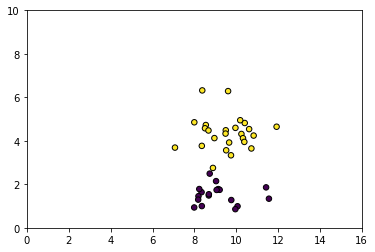

In [7]:
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler, QuantileTransformer, PowerTransformer

X, y = make_blobs(n_samples=50, centers=2, random_state=4, cluster_std=1)

plt.scatter(X[:,0], X[:, 1], c=y, s=30, edgecolors='black')
plt.xlim(0, 16)
plt.ylim(0, 10)

C:\Users\consi\anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:2367: UserWarning: n_quantiles (1000) is greater than the total number of samples (50). n_quantiles is set to n_samples.
  warnings.warn("n_quantiles (%s) is greater than the total number "


(0.0, 5.0)

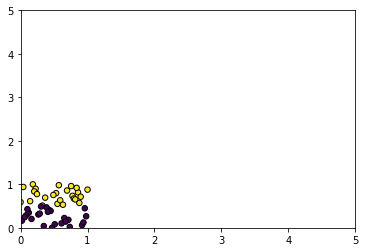

In [8]:
scaler = QuantileTransformer()
X_trans = scaler.fit_transform(X)

plt.scatter(X_trans[:,0], X_trans[:, 1], c=y, s=30, edgecolors='black')
plt.xlim(0, 5)
plt.ylim(0, 5)

(array([[5., 5., 5., 5., 5., 5., 5., 5., 5., 5.],
        [5., 5., 5., 5., 5., 5., 5., 5., 5., 5.]]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 2 BarContainer objects>)

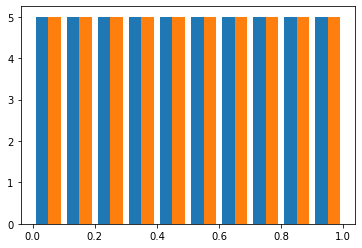

In [9]:
plt.hist(X_trans)

In [10]:
from sklearn.svm import SVC

X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state=0)

svc = SVC(C=100).fit(X_train, y_train)

print("train score:", svc.score(X_train, y_train))
print("test score:", svc.score(X_test, y_test))

train score: 0.9413145539906104
test score: 0.9440559440559441


In [11]:
scaler = MinMaxScaler().fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

svm = SVC(C=100).fit(X_train_scaled, y_train)

print("train score:", svm.score(X_train_scaled, y_train))
print("test score:", svm.score(X_test_scaled, y_test))

train score: 1.0
test score: 0.965034965034965


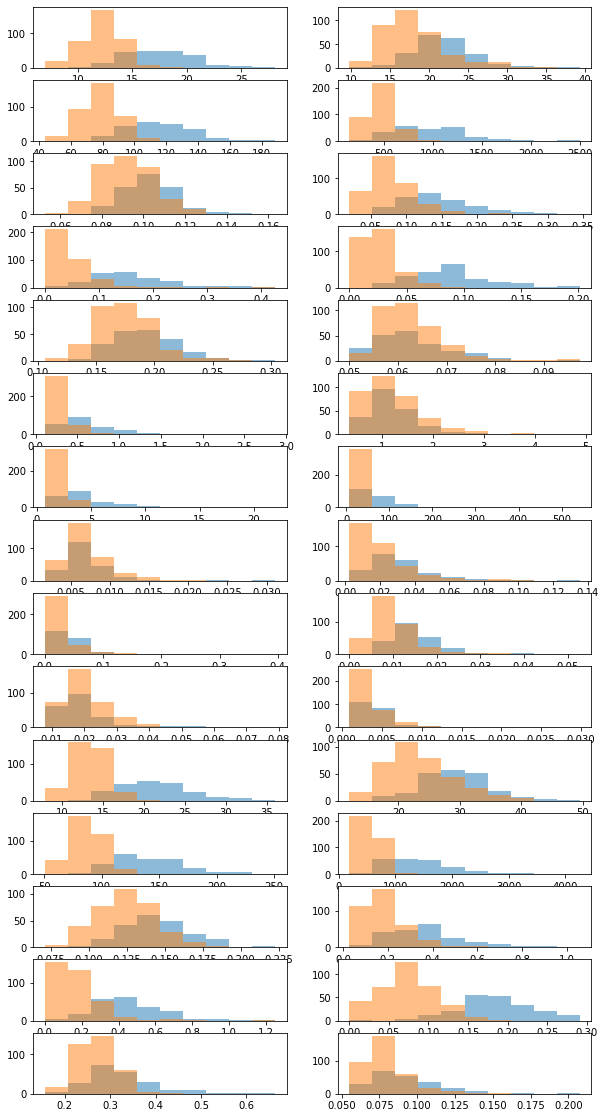

In [12]:
fig, axes = plt.subplots(15, 2, figsize=(10,20))
malignant = cancer.data[cancer.target == 0]
benign = cancer.data[cancer.target==1]

ax = axes.ravel()

for i in range(30):
    _, bins = np.histogram(cancer.data[:, i])
    ax[i].hist(malignant[:,i], bins=bins, alpha=.5)
    ax[i].hist(benign[:,i], bins=bins, alpha=.5)

In [13]:
from sklearn.decomposition import PCA

cancer = load_breast_cancer()

scaler = StandardScaler().fit(cancer.data)

X_scaled = scaler.transform(cancer.data)

pca = PCA(n_components=2)

pca.fit(X_scaled)

X_pca = pca.transform(X_scaled)

print("original data shape:", X_scaled.shape)
print("pca data shape:", X_pca.shape)

original data shape: (569, 30)
pca data shape: (569, 2)


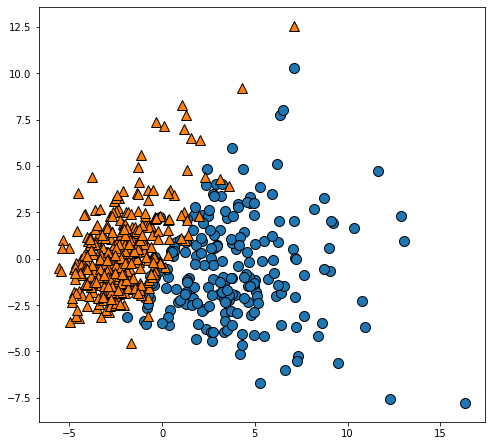

In [14]:
plt.figure(figsize=(8,8))
mglearn.discrete_scatter(X_pca[:, 0], X_pca[:, 1], cancer.target)
plt.gca().set_aspect("equal")

In [15]:
print("PCA main component shape:", pca.components_.shape)

PCA main component shape: (2, 30)


In [16]:
print("PCA main component:\n", pca.components_)

PCA main component:
 [[ 0.21890244  0.10372458  0.22753729  0.22099499  0.14258969  0.23928535
   0.25840048  0.26085376  0.13816696  0.06436335  0.20597878  0.01742803
   0.21132592  0.20286964  0.01453145  0.17039345  0.15358979  0.1834174
   0.04249842  0.10256832  0.22799663  0.10446933  0.23663968  0.22487053
   0.12795256  0.21009588  0.22876753  0.25088597  0.12290456  0.13178394]
 [-0.23385713 -0.05970609 -0.21518136 -0.23107671  0.18611302  0.15189161
   0.06016536 -0.0347675   0.19034877  0.36657547 -0.10555215  0.08997968
  -0.08945723 -0.15229263  0.20443045  0.2327159   0.19720728  0.13032156
   0.183848    0.28009203 -0.21986638 -0.0454673  -0.19987843 -0.21935186
   0.17230435  0.14359317  0.09796411 -0.00825724  0.14188335  0.27533947]]


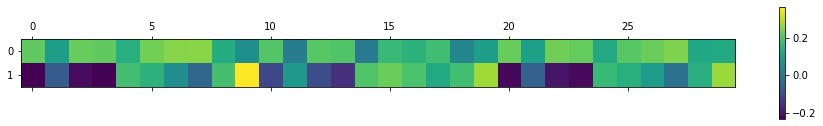

In [17]:
plt.matshow(pca.components_, cmap="viridis")
plt.colorbar()

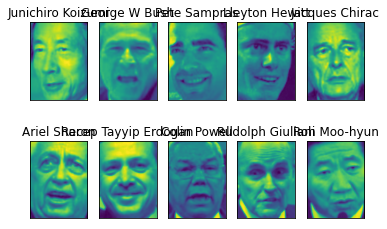

In [18]:
from sklearn.datasets import fetch_lfw_people

people = fetch_lfw_people(min_faces_per_person=20, resize=.7)
image_shape = people.images[0].shape
fig, axes = plt.subplots(2, 5, subplot_kw={'xticks':(), 'yticks':()})

for image, target, ax in zip(people.images, people.target, axes.ravel()):
    ax.imshow(image)
    ax.set_title(people.target_names[target])

In [20]:
print("people.images.shape:", people.images.shape)
print("target shape:", people.target.shape)

people.images.shape: (2916, 87, 65)
target shape: (2916,)


In [21]:
counts = np.bincount(people.target)

for i, (count, name) in enumerate(zip(counts, people.target_names)):
    print("{0:25} {1:3}".format(name, count), end="       ")
    if (i+1) % 3 == 0:
        print("")

Alejandro Toledo           39       Alvaro Uribe               35       Amelie Mauresmo            21       
Andre Agassi               36       Ariel Sharon               77       Arnold Schwarzenegger      42       
Atal Bihari Vajpayee       24       Bill Clinton               29       Carlos Menem               21       
Colin Powell              236       David Beckham              31       Donald Rumsfeld           121       
George Robertson           22       George W Bush             530       Gerhard Schroeder         109       
Gloria Macapagal Arroyo    44       Gray Davis                 26       Hamid Karzai               22       
Hans Blix                  39       Hugo Chavez                71       Igor Ivanov                20       
Jack Straw                 28       Jacques Chirac             52       Jean Chretien              55       
Jennifer Aniston           21       Jennifer Capriati          42       Jennifer Lopez             21       
Jeremy Greenstock  

In [23]:
mask = np.zeros(people.target.shape, dtype=np.bool)

for target in np.unique(people.target):
    mask[np.where(people.target == target)[0][:50]] = 1

X_people = people.data[mask]
y_poeple = people.target[mask]

X_people = X_people/255

In [24]:
from sklearn.neighbors import KNeighborsClassifier

X_train, X_test, y_train, y_test = train_test_split(X_people, y_poeple, random_state=0, stratify=y_poeple)

k_nn = KNeighborsClassifier(n_neighbors=1).fit(X_train, y_train)

print("train score:", k_nn.score(X_train, y_train))
print("test score:", k_nn.score(X_test, y_test))

train score: 1.0
test score: 0.25766871165644173


In [25]:
pca = PCA(n_components=100, whiten=True, random_state=0).fit(X_train)
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)

print("X_train_pca.shape:", X_train_pca.shape)

X_train_pca.shape: (1467, 100)


In [26]:
k_nn = KNeighborsClassifier(n_neighbors=1).fit(X_train_pca, y_train)

print("train score:", k_nn.score(X_train_pca, y_train))
print("test score:", k_nn.score(X_test_pca, y_test))

train score: 1.0
test score: 0.31901840490797545


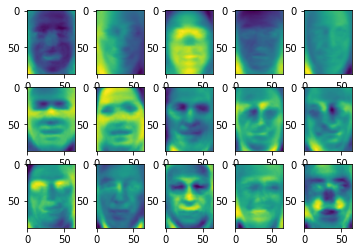

In [27]:
fig, axes = plt.subplots(3, 5)
for i, (component, ax) in enumerate(zip(pca.components_, axes.ravel())):
    ax.imshow(component.reshape(image_shape))

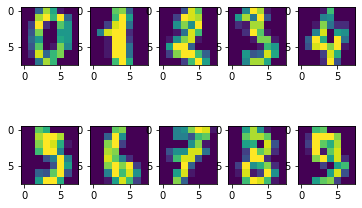

In [28]:
from sklearn.datasets import load_digits

digits = load_digits()

fig, axes = plt.subplots(2, 5)

for i, (image, ax) in enumerate(zip(digits.images, axes.ravel())):
    ax.imshow(image)

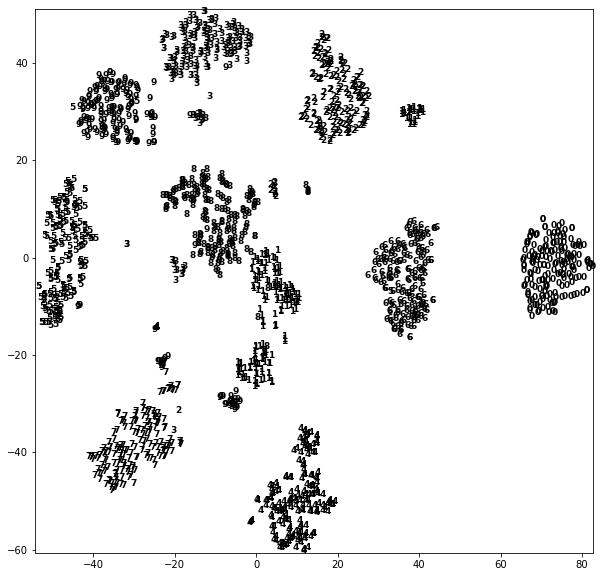

In [31]:
from sklearn.manifold import TSNE

tsne = TSNE(random_state=0)
digits_tsne = tsne.fit_transform(digits.data)

plt.figure(figsize=(10,10))
plt.xlim(digits_tsne[:,0].min(), digits_tsne[:,0].max()+1)
plt.ylim(digits_tsne[:,1].min(), digits_tsne[:,1].max()+1)
for i in range(len(digits.data)):
    plt.text(digits_tsne[i, 0], digits_tsne[i, 1], str(digits.target[i]), fontdict={'weight':'bold', 'size':9})